# Exploratory Data Analysis

We are storing the data under the path `/data/wine_data.csv` relative to the project root, however the notebook server sets our working directory as `/notebooks`. We will need our import path to then be `../data/wine_data.csv`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd
df = pd.read_csv('../data/wine_data.csv', sep=';')

Taking a random sample of 10 observations:

In [10]:
df.sample(10).T

,2546,2302,3350,2487,542,2585,2545,2400,4243,2700
fixed acidity,6.70000,6.00000,7.2000,7.90000,5.500,6.80000,7.20000,9.20000,6.80000,6.50000
volatile acidity,0.50000,0.26000,0.2200,0.27000,0.350,0.18000,0.22000,0.19000,0.26000,0.46000
citric acid,0.38000,0.18000,0.2800,0.27000,0.350,0.30000,0.24000,0.42000,0.26000,0.31000
residual sugar,7.50000,7.00000,7.2000,1.70000,1.100,12.80000,1.40000,2.00000,2.00000,5.00000
chlorides,0.04600,0.05500,0.0600,0.03400,0.045,0.06200,0.04100,0.04700,0.01900,0.02700
free sulfur dioxide,26.00000,50.00000,41.0000,25.00000,14.000,19.00000,17.00000,16.00000,23.50000,15.00000
total sulfur dioxide,175.00000,194.00000,132.0000,122.00000,167.000,171.00000,159.00000,104.00000,72.00000,72.00000
density,0.99662,0.99591,0.9935,0.99088,0.992,0.99808,0.99196,0.99517,0.99041,0.99165
pH,3.32000,3.21000,3.0800,2.97000,3.340,3.00000,3.25000,3.09000,3.16000,3.26000
sulphates,0.54000,0.43000,0.5900,0.51000,0.680,0.52000,0.53000,0.66000,0.47000,0.60000


In [22]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Initial EDA
Let's start by looking a some simple distributions.

In [41]:
quality_counts = pd.Series([0 for i in range(0, 10+1)])  # Builds required structure
quality_counts.update(df.quality.value_counts())  # Updates with actual counts (defaults 0 if no count)
quality_counts

0        0
1        0
2        0
3       20
4      163
5     1457
6     2198
7      880
8      175
9        5
10       0
dtype: int64

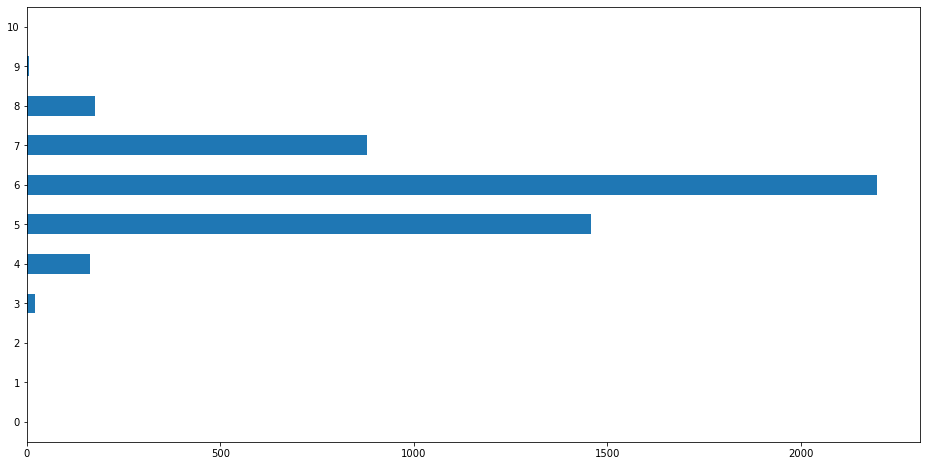

In [42]:
f, ax = plt.subplots(figsize=(16, 8))
ax.set_ylim([0, 10])
quality_counts.plot.barh(ax=ax)

It looks like most of the data is localised around the 5-7 score.

## Correlation & Feature Engineering 

It looks like we don't have any string columns to deal with. We should, however, investigate the correlation between the features. 

In [3]:
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), ax=ax)

The first questions that surface from this chart:

- There appears to be a relationship between the density, residual sugar, and alcohol features. 
- There is another (expected) relationship between the total sulfur dioxide and the free sulfur dioxide.
- Surprisingly, there is little relationship between the fixed acidity and the volatile acidity in the wine. 
- The quality of the wine seems to be correlated strongly with the alcohol content of the wine.

Without going deep into the science between wines, which would enable us to engineer "smarter" features, let's start here in reducing the number of features present.

This immediately raises the following questions:

1. Why is there no relationship between the fixed and volatile acidity in the wine? Is there a way to engineer an interesting feature from these two features? Should we include citric acid in our engineered features?
2. What is the relationship between the density, residual sugar, and alcohol?
3. What is the relationship between the free sulfur dioxide and the total sulfur dioxide? Can we engineer some new features out of these two features? 

## Question 1: Relationship Between Acids

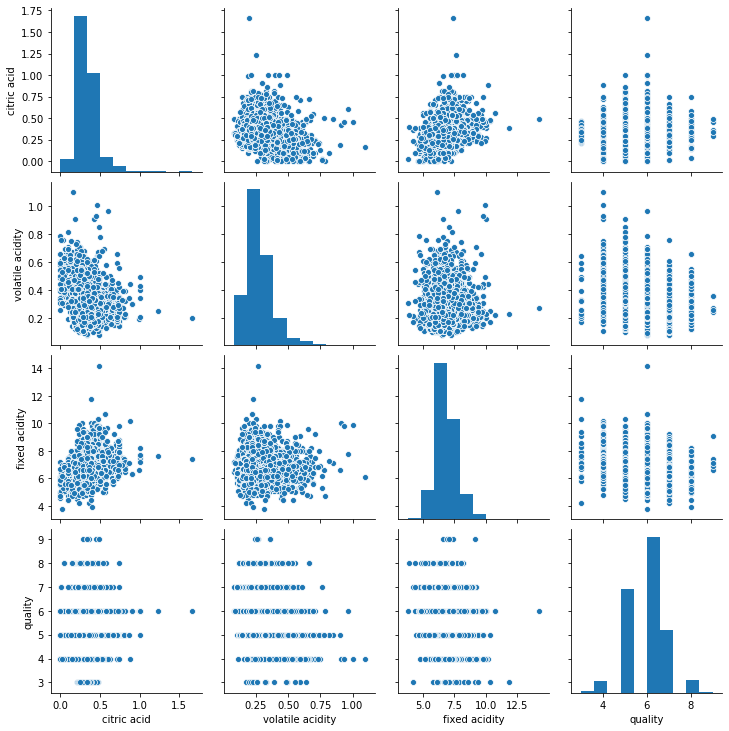

In [4]:
dff = df[[
    'citric acid',
    'volatile acidity',
    'fixed acidity',
    'quality'
]]
sns.pairplot(dff)

There doesn't appear to be any glaringly obvious relationships from the pair plot. Let's just look at each acid in relationship with the quality.

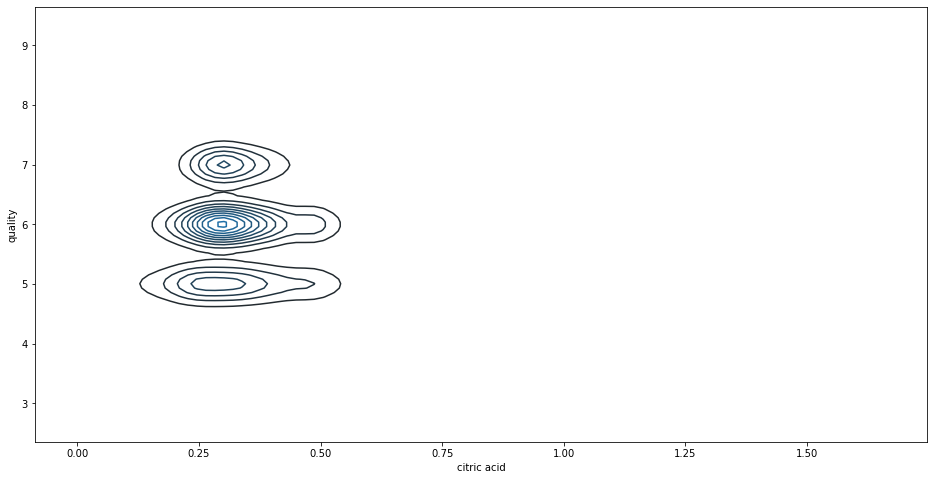

In [5]:
f, ax = plt.subplots(figsize=(16, 8))
sns.kdeplot(dff['citric acid'], dff['quality'], ax=ax)

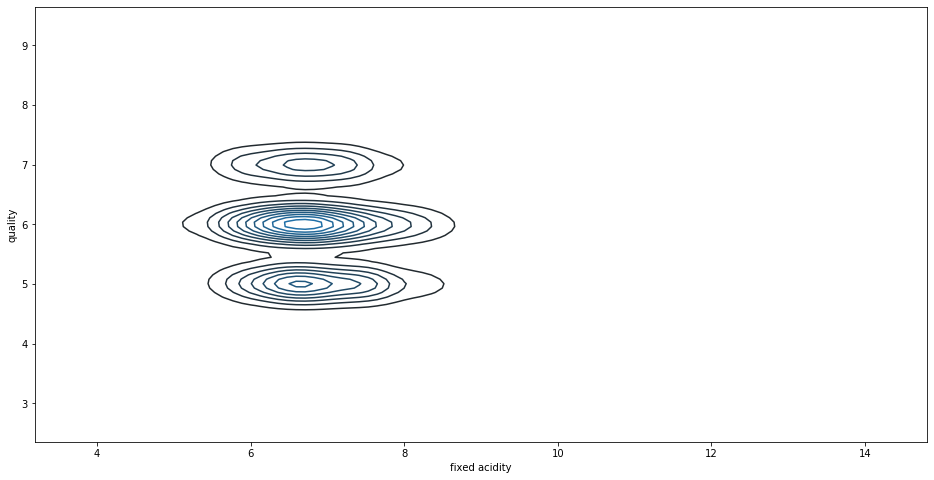

In [6]:
f, ax = plt.subplots(figsize=(16, 8))
sns.kdeplot(dff['fixed acidity'], dff['quality'], ax=ax)

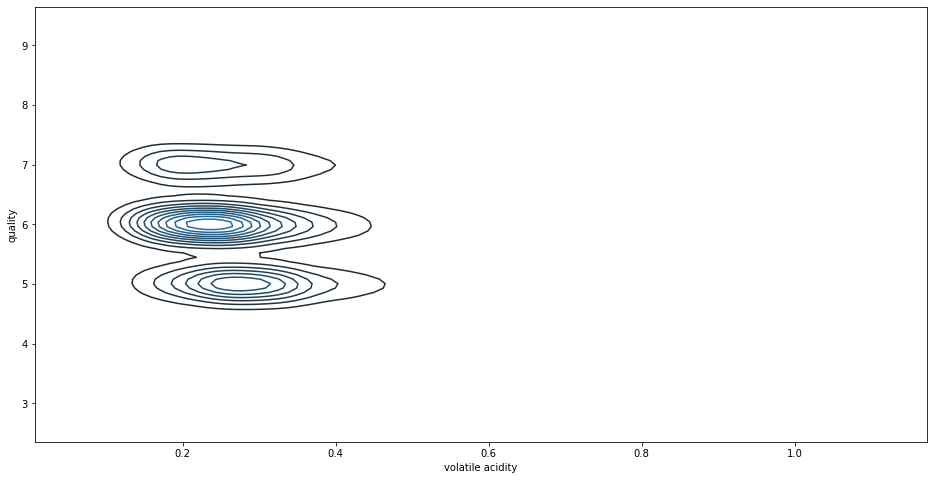

In [7]:
f, ax = plt.subplots(figsize=(16, 8))
sns.kdeplot(dff['volatile acidity'], dff['quality'], ax=ax)

Nothing interesting has come out of those plots. Let's try to engineer a total acidity measure and see how well that correlates to the quality measure.